In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# import data
df_features = pd.read_csv('x_train_gr_smpl.csv') #read features csv as dataframe
df_classes = pd.read_csv('y_train_smpl.csv') #read classes csv as dataframe
df_classes.columns = ['class'] #rename classes header to 'class'
df_concat = pd.concat([df_features,df_classes],axis=1) #concatinate features dataframe with class dataframe column
df_concat.head(10)

0     1     2     3     4     5     6     7     8     9  ...  2295  \
0  30.0  29.0  28.0  29.0  31.0  30.0  29.0  28.0  27.0  26.0  ...  32.0   
1  31.0  31.0  33.0  32.0  31.0  30.0  29.0  28.0  28.0  28.0  ...  34.0   
2  30.0  30.0  31.0  29.0  28.0  27.0  26.0  28.0  30.0  31.0  ...  35.0   
3  26.0  25.0  24.0  24.0  24.0  27.0  28.0  29.0  29.0  30.0  ...  34.0   
4  25.0  26.0  28.0  28.0  28.0  28.0  28.0  27.0  26.0  25.0  ...  31.0   
5  27.0  27.0  28.0  27.0  26.0  24.0  24.0  23.0  23.0  23.0  ...  35.0   
6  24.0  24.0  24.0  25.0  25.0  26.0  25.0  23.0  21.0  21.0  ...  37.0   
7  24.0  25.0  25.0  23.0  22.0  22.0  22.0  22.0  22.0  22.0  ...  34.0   
8  20.0  21.0  22.0  21.0  21.0  21.0  20.0  20.0  22.0  22.0  ...  35.0   
9  20.0  20.0  21.0  20.0  19.0  18.0  18.0  18.0  18.0  19.0  ...  32.0   

   2296  2297  2298  2299  2300  2301  2302  2303  class  
0  35.0  38.0  39.0  39.0  40.0  39.0  39.0  38.0      0  
1  35.0  36.0  36.0  37.0  38.0  38.0  37.0  37.0      0  
2  37.0  37.0  38.0  39.0  38.0  38.0  39.0  40.0      0  
3  36.0  37.0  38.0  42.0  40.0  37.0  36.0  36.0      0  
4  33.0  37.0  38.0  37.0  36.0  36.0  35.0  35.0      0  
5  36.0  38.0  39.0  40.0  38.0  36.0  35.0  36.0      0  
6  37.0  37.0  37.0  38.0  38.0  36.0  35.0  34.0      0  
7  34.0  37.0  41.0  40.0  40.0  41.0  35.0  31.0      0  
8  34.0  35.0  37.0  35.0  35.0  37.0  35.0  34.0      0  
9  37.0  39.0  36.0  38.0  38.0  35.0  35.0  36.0      0  

[10 rows x 2305 columns]

In [3]:
df_concat['class'].value_counts() #find how many pictures each class has

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: class, dtype: int64

In [4]:
np.random.seed(0) #use the same random sample each time
class7_lenght = len(df_concat[df_concat['class']==7]) #take the lenght of the smallest class (class7)
indices_class7 = df_concat[df_concat['class']==7].index #take the indices of the class7 images
# random indices class 5
indices_class5 = df_concat[df_concat['class']==5].index #take the indices of the class5 images
random_class5_indices = np.random.choice(indices_class5,class7_lenght, replace=False) #take 240 random indices from class5
# random indices class 4
indices_class4 = df_concat[df_concat['class']==4].index
random_class4_indices = np.random.choice(indices_class4,class7_lenght, replace=False)
# random indices class 8
indices_class8 = df_concat[df_concat['class']==8].index
random_class8_indices = np.random.choice(indices_class8,class7_lenght, replace=False)
# random indices class 1
indices_class1 = df_concat[df_concat['class']==1].index
random_class1_indices = np.random.choice(indices_class1,class7_lenght, replace=False)
# random indices class 0
indices_class0 = df_concat[df_concat['class']==0].index
random_class0_indices = np.random.choice(indices_class0,class7_lenght, replace=False)
# random indices class 3
indices_class3 = df_concat[df_concat['class']==3].index
random_class3_indices = np.random.choice(indices_class3,class7_lenght, replace=False)
# random indices class 6
indices_class6 = df_concat[df_concat['class']==6].index
random_class6_indices = np.random.choice(indices_class6,class7_lenght, replace=False)
# random indices class 2
indices_class2 = df_concat[df_concat['class']==2].index
random_class2_indices = np.random.choice(indices_class2,class7_lenght, replace=False)
# random indices class 9
indices_class9 = df_concat[df_concat['class']==9].index
random_class9_indices = np.random.choice(indices_class9,class7_lenght, replace=False)
#concatinate random indices from all classes to one array
indices_combined = np.concatenate([random_class5_indices,random_class4_indices,random_class8_indices,random_class1_indices, random_class0_indices,random_class3_indices, random_class6_indices,random_class2_indices, random_class9_indices, indices_class7])
len(indices_combined) #random indices array length (10*240)

2400

In [5]:
#find all these random indices from the df_concat dataframe and put them in a new dataframe df_balanced
#now we have a balanced dataframe with 240 images of each class
df_balanced = df_concat.loc[indices_combined] 

In [6]:
df_balanced.reset_index(inplace = True) #reset the indices of the new dataframe
dataset_big = df_balanced.drop(['index'],axis=1) #drop the index column from the new dataframe
dataset_big.head(10)

0      1      2      3      4      5      6      7      8      9  ...  \
0  174.0  242.0  214.0  115.0  107.0   91.0   48.0   33.0   47.0  128.0  ...   
1   47.0   41.0   28.0   39.0  109.0  226.0  255.0  255.0  255.0  255.0  ...   
2   37.0   36.0   37.0   39.0   42.0   41.0   39.0   37.0   36.0   34.0  ...   
3   26.0   25.0   26.0   30.0   31.0   30.0   30.0   31.0   33.0   33.0  ...   
4   70.0   77.0   72.0   72.0   73.0   75.0   76.0   73.0   79.0   77.0  ...   
5  141.0  140.0  142.0  145.0  179.0  245.0  255.0  255.0  249.0  196.0  ...   
6   36.0   39.0   35.0   34.0   34.0   31.0   30.0   34.0   35.0   32.0  ...   
7   37.0   30.0   32.0   53.0  164.0  203.0  228.0  217.0  148.0  163.0  ...   
8  133.0  133.0  134.0  132.0  130.0  133.0  135.0  135.0  135.0  136.0  ...   
9   55.0   47.0   39.0   48.0   47.0   47.0   47.0   48.0   48.0   49.0  ...   

   2295   2296   2297   2298  2299  2300   2301   2302   2303  class  
0  81.0  114.0  106.0   82.0  80.0  78.0   76.0   67.0   83.0      5  
1  55.0   48.0   33.0   26.0  29.0  19.0   25.0   33.0   25.0      5  
2  68.0   46.0   35.0   31.0  29.0  28.0   35.0   46.0   55.0      5  
3  53.0   49.0   50.0   85.0  77.0  72.0   39.0   31.0   33.0      5  
4  62.0   61.0   67.0   65.0  62.0  58.0   59.0   61.0   63.0      5  
5  71.0   74.0   95.0  100.0  70.0  63.0  117.0  123.0   91.0      5  
6  28.0   26.0   26.0   27.0  27.0  26.0   25.0   24.0   26.0      5  
7  35.0   42.0   36.0   38.0  56.0  84.0   90.0   87.0   73.0      5  
8  52.0   58.0   63.0   67.0  68.0  65.0   65.0   89.0  105.0      5  
9  44.0   43.0   44.0   44.0  41.0  44.0   44.0   42.0   43.0      5  

[10 rows x 2305 columns]

In [7]:
X = dataset_big.iloc[:,:-1].values #we drop the last value which is the class to create a features dataframe
y = dataset_big.iloc[:,2304].values #we keep only the last value to create a class dataframe

In [8]:
#we split the sample to train and test with an 80-20 analogy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) 

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
cm = confusion_matrix(y_test,y_pred)
cm #confusion matrix 

array([[32,  7,  1,  2,  1,  2,  0,  0,  3,  0],
       [11, 25,  3,  2,  2,  2,  1,  1,  1,  0],
       [ 1,  2, 43,  1,  0,  1,  0,  0,  0,  0],
       [ 0,  2,  0, 39,  2,  1,  0,  1,  1,  2],
       [ 2,  1,  0,  2, 37,  1,  1,  2,  2,  0],
       [ 0,  1,  0,  0,  0, 41,  0,  0,  6,  0],
       [ 0,  1,  2,  1,  0,  0, 42,  1,  1,  0],
       [ 0,  1,  2,  0,  3,  0,  0, 42,  0,  0],
       [ 1,  2,  1,  0,  3,  3,  0,  1, 37,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 47]], dtype=int64)

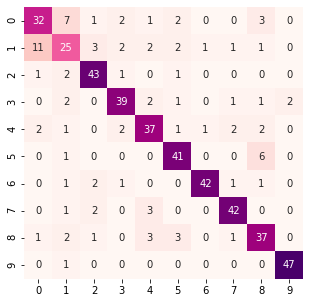

In [11]:
#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
ax.set_ylim(10.0, 0)
plt.show()

In [12]:
#classidication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67        48
           1       0.58      0.52      0.55        48
           2       0.83      0.90      0.86        48
           3       0.83      0.81      0.82        48
           4       0.77      0.77      0.77        48
           5       0.80      0.85      0.83        48
           6       0.95      0.88      0.91        48
           7       0.88      0.88      0.88        48
           8       0.73      0.77      0.75        48
           9       0.96      0.98      0.97        48

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [13]:
# ten fold cross validation
# scoring='precision' , scoring='recall' , scoring='f1'
accuracy = cross_val_score(estimator = clf, X = X, y = y, cv =10)
accuracy

array([0.7875    , 0.71666667, 0.75833333, 0.74583333, 0.8       ,
       0.71666667, 0.75416667, 0.78333333, 0.8125    , 0.77916667])

In [14]:
#accuracy.mean after running the model for 10 times 
accuracy.mean()

0.7654166666666666

In [15]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,rounded=True,class_names=True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_png('tree.png')
# Show graph
Image(graph.create_png())

In [42]:
X_test = pd.read_csv('x_test_gr_smpl.csv') #read X_test csv as dataframe
y_test = pd.read_csv('y_test_smpl.csv') #read y_test csv as dataframe
y_test.columns = ['class'] #rename classes header to 'class'
# df_concat = pd.concat([X_test,y_test],axis=1) #concatinate features dataframe with class dataframe column
# df_concat['class'].value_counts()

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [18]:
cm = confusion_matrix(y_test,y_pred)

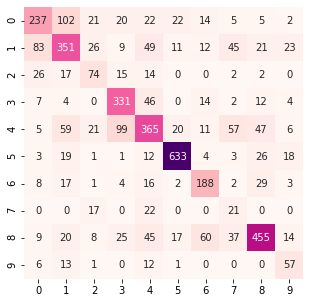

In [19]:
#we transform the confusion matrix to a heatmap
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(cm,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
ax.set_ylim(10.0, 0)
plt.show()

In [20]:
#classidication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       450
           1       0.58      0.56      0.57       630
           2       0.44      0.49      0.46       150
           3       0.66      0.79      0.72       420
           4       0.61      0.53      0.56       690
           5       0.90      0.88      0.89       720
           6       0.62      0.70      0.66       270
           7       0.12      0.35      0.18        60
           8       0.76      0.66      0.71       690
           9       0.45      0.63      0.53        90

    accuracy                           0.65      4170
   macro avg       0.57      0.61      0.58      4170
weighted avg       0.67      0.65      0.66      4170



In [56]:
# df_concat1 = pd.concat([X_test,y_test],axis=1)
# sampleFromOrigin = dataset_big.sample(720, replace=False)
# df_concat2 = pd.concat([df_concat1,sampleFromOrigin],axis=0)
# df_concat2.reset_index(inplace = True)
# t=df_concat2.drop(['index'],axis=1)
# t

In [23]:
# clf_entropy = DecisionTreeClassifier(criterion = "entropy")

# # Train Decision Tree Classifer
# clf_entropy = clf_entropy.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred_entropy = clf_entropy.predict(X_test)

In [24]:
# cm_entropy = confusion_matrix(y_test,y_pred_entropy)
# cm_entropy #confusion matrix 

In [25]:
# #we transform the confusion matrix to a heatmap
# fig, ax = plt.subplots(figsize=(5,5))
# ax = sns.heatmap(cm_entropy,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
# ax.set_ylim(10.0, 0)
# plt.show()

In [26]:
# #classidication report
# print(classification_report(y_test,y_pred_entropy))

In [27]:
# # ten fold cross validation
# # scoring='precision' , scoring='recall' , scoring='f1'
# accuracy = cross_val_score(estimator = clf_entropy, X = X, y = y, cv =10)

In [28]:
# #accuracy.mean after running the model for 10 times 
# accuracy.mean()

In [29]:
# # Create DOT data
# dot_data_entropy = tree.export_graphviz(clf_entropy, out_file=None,filled=True,rounded=True,
#                                      class_names=True)
# # Draw graph
# graph_entropy = pydotplus.graph_from_dot_data(dot_data_entropy) 
# graph_entropy.write_png('tree_entropy.png')
# # Show graph
# Image(graph_entropy.create_png())

In [30]:
# # Instantiate model with 100 decision trees
# rf = RandomForestRegressor(n_estimators = 100)
# # Train the model on training data
# rf.fit(X_train,y_train)

In [31]:
# # Use the forest's predict method on the test data
# y_pred_rf = rf.predict(X_test)

In [32]:
# cm_rf = confusion_matrix(y_test,y_pred_rf)
# cm_rf #confusion matrix 

In [33]:
# #we transform the confusion matrix to a heatmap
# fig, ax = plt.subplots(figsize=(5,5))
# ax = sns.heatmap(cm_rf,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
# ax.set_ylim(10.0, 0)
# plt.show()

In [34]:
# #classidication report
# print(classification_report(y_test,y_pred_rf))

In [35]:
# # ten fold cross validation
# # scoring='precision' , scoring='recall' , scoring='f1'
# accuracy = cross_val_score(estimator = rf, X = X, y = y, cv =10)

In [36]:
# #accuracy.mean after running the model for 10 times 
# accuracy.mean()

In [37]:
# # Create DOT data
# dot_data_rf = tree.export_graphviz(rf, out_file=None,filled=True,rounded=True,
#                                      class_names=True)
# # Draw graph
# graph_rf = pydotplus.graph_from_dot_data(dot_data_rf) 
# graph_rf.write_png('randomForest.png')
# # Show graph
# Image(graph_rf.create_png())